In [2]:
library('igraph')

Warning message:
"package 'igraph' was built under R version 3.4.4"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [7]:
allcomp = read.csv("name_sector.csv",header=TRUE,stringsAsFactors=FALSE)

head(allcomp)

Symbol,Sector
A,Health Care
AAL,Industrials
AAP,Consumer Discretionary
AAPL,Information Technology
ABBV,Health Care
ABC,Health Care


In [8]:
dim(allcomp)
colnames(allcomp)
allcomp[2,1]

[1] 505   2

[1] "Symbol" "Sector"

[1] "AAL"

In [10]:
filenames <- list.files("data", pattern="*.csv")
filenames = paste("data", filenames, sep="/")

In [11]:
length(filenames)

[1] 505

In [12]:
L=c()
k=1
mat = matrix(0,length(filenames)-11,764)
for(j in c(1:length(filenames))){
    df = read.csv(filenames[j],header=TRUE, stringsAsFactors=FALSE)
    L[j] = dim(df)[1]
    if(L[j]==765){
        p = df[,5] 
        q = c()
        r = c()
        for(i in c(2:length(p))){
            q[i-1] = (p[i]-p[i-1])/p[i-1]
        }
        r = log(1+q)
        mat[k,] = r
        k = k+1
    }
}

In [13]:
allcomp["length"] = L
ind = which(L!=765)

allcomp <- allcomp[-ind,]

dim(allcomp)

[1] 494   3

In [25]:
getedgelist<- function(conn,mat,allcomp){
    numCom = dim(mat)[1]
    cat("from","\t","to","\t","wt",file=conn)
    for(i in c(1:(numCom-1))){
        for(j in c((i+1):numCom)){
            ri = mean(mat[i,])
            rj = mean(mat[j,])
            mult = mean(mat[i,]*mat[j,])
            num = mult-(ri*rj)
            ri2 = mat[i,]^2
            rj2 = mat[j,]^2
            den = sqrt((mean(ri2)-(ri^2))*(mean(rj2)-(rj^2)))
            pij = num/den
            wij = sqrt(2*(1-pij))
            cat('\n',allcomp[i,1],'\t',allcomp[j,1],'\t',wij,file=conn)
        }
    }
}

In [12]:
conn <- file("edgelist.txt", "w")
getedgelist(conn,mat,allcomp)
close(conn)

In [3]:
elist <-read.delim("edgelist.txt",header=TRUE)
g <- graph.data.frame(elist, directed = FALSE)
E(g)$weight <- elist[,"wt"]

In [14]:
head(elist)

from,to,wt
A,AAL,1.189554
A,AAP,1.269710
A,AAPL,1.373192
A,ABBV,1.129386
A,ABC,1.248807
A,ABT,1.021796


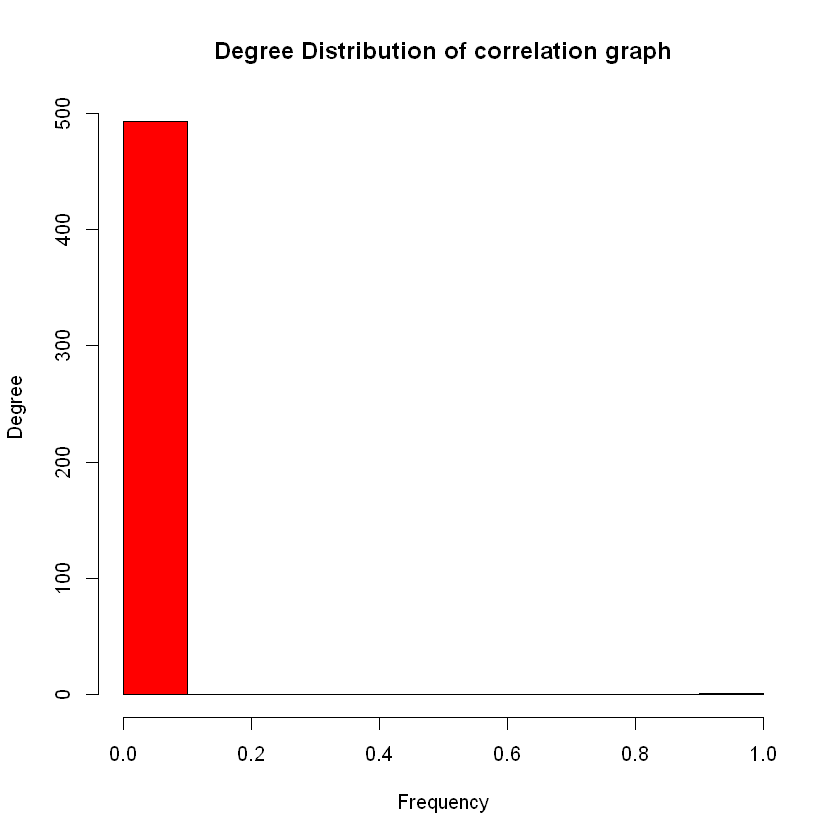

In [45]:
hist(degree.distribution(g),pch=15,col="red",main="Degree Distribution of correlation graph",
    ylab="Degree",xlab="Frequency")

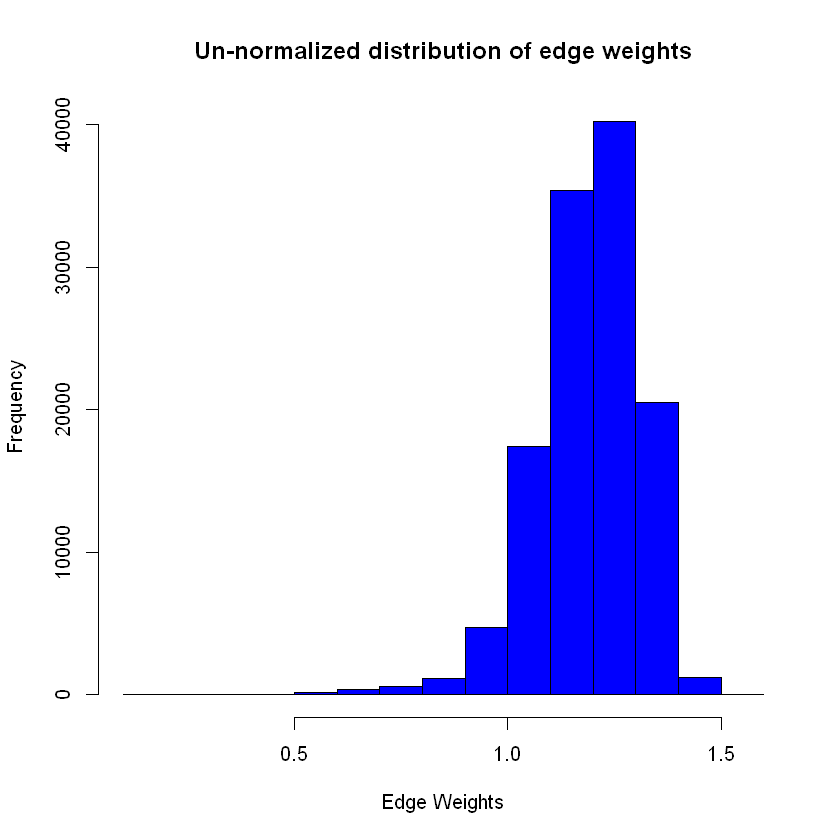

In [35]:
hist(elist[,"wt"],col="blue",main="Un-normalized distribution of edge weights",xlab="Edge Weights",ylab="Frequency")

In [4]:
mst = mst(g,algorithm="prim")
mst

IGRAPH ecb3aca UNW- 494 493 -- 
+ attr: name (v/c), wt (e/n), weight (e/n)
+ edges from ecb3aca (vertex names):
 [1]  A    -- TMO    AAL  -- DAL    AAP  -- ORLY   AAPL -- UNP    ABBV -- AMGN 
 [6]  ABC  -- CAH    ABT  -- HOLX   ABT  -- MDT    ABT  -- TMO    ABT  -- VAR  
[11]  ACN  -- CTSH   ACN  -- FISV   ACN  -- ORCL   ACN  -- RHT    ADBE -- CRM  
[16]  ADBE -- INTU   ADI  -- TXN    ADI  -- XLNX   ADM  -- PFG    ADP  -- PAYX 
[21]  ADS  -- DFS    ADSK -- MCO    AEE  -- XEL    AEP  -- DUK    AEP  -- ETR  
[26]  AEP  -- FE     AEP  -- PPL    AEP  -- XEL    AES  -- CNP    AES  -- NRG  
[31]  AET  -- ANTM   AET  -- CNC    AET  -- HUM    AET  -- UNH    AFL  -- PRU  
[36]  AGN  -- AMGN   AGN  -- MYL    AIG  -- JPM    AIV  -- REG    AIV  -- UDR  
+ ... omitted several edges

In [18]:
ecount(mst)
vcount(mst)
allsectors = unique(allcomp[,2])
allsectors
allcomp[490,]
V(g)[490]

[1] 493

[1] 494

[1] "Health Care"                "Industrials"               
 [3] "Consumer Discretionary"     "Information Technology"    
 [5] "Consumer Staples"           "Utilities"                 
 [7] "Financials"                 "Real Estate"               
 [9] "Materials"                  "Energy"                    
[11] "Telecommunication Services"

,Symbol,Sector,length
501,YHOO,Information Technology,765


+ 1/494 vertex, named, from 6fdb93d:
[1]  YHOO 

In [14]:
allsectors = unique(allcomp[,2])

colorcode<-function(allsect,sector){
    i = which(allsect==sector)
    color = switch(i,"red","green","blue","yellow","grey","black","pink","orange","yellowgreen","skyblue","peachpuff")
    return(color)
}

In [15]:
getcolorvector <- function(g,allsect,allcomp){
    colors = c()
    for(v in c(1:vcount(g))){
        sector = allcomp[v,2]
        colors[v] = colorcode(allsect,sector)
    }
    return(colors)
}


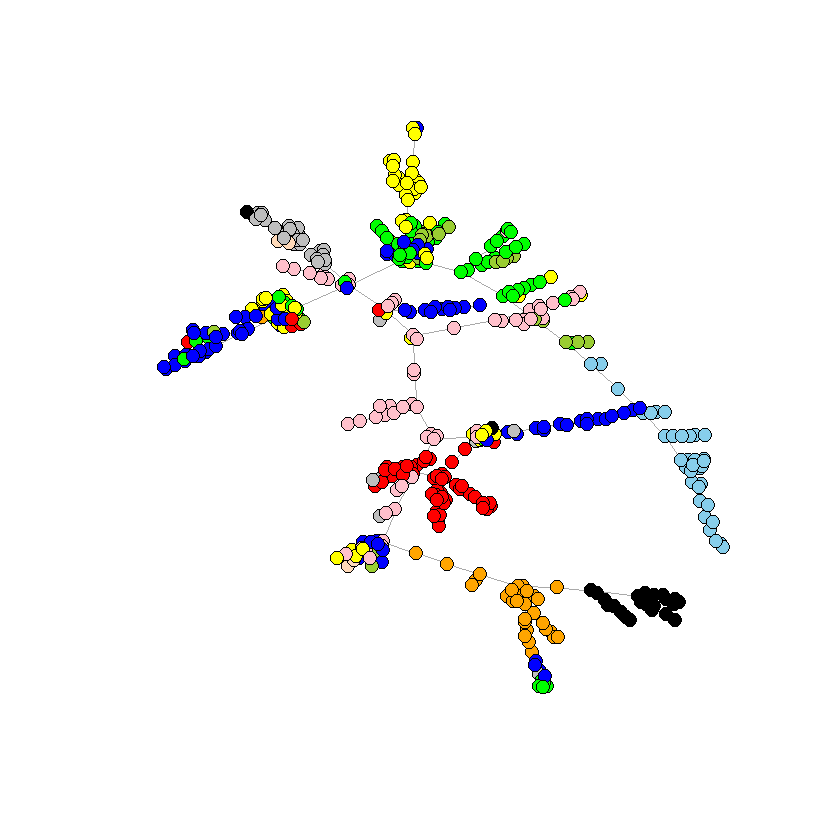

In [21]:
colors = getcolorvector(g,allsectors,allcomp)
plot(mst,vertex.size=5, vertex.label=NA, vertex.color=colors)

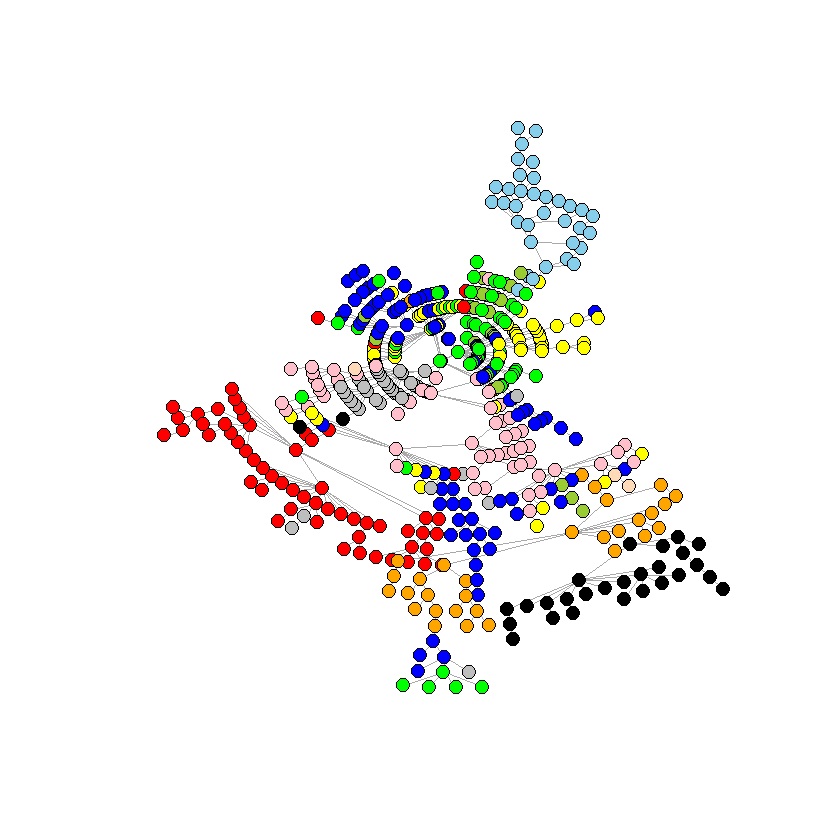

In [20]:
colors = getcolorvector(g,allsectors,allcomp)
plot(mst,vertex.size=5, vertex.label=NA, vertex.color=colors, layout=layout.reingold.tilford(mst,circular=T))

In [23]:
counts = c()
for(i in c(1:length(allsectors))){
    counts[i] = length(which(allcomp[,2]==allsectors[i]))
}

counts

[1] 60 64 84 66 36 28 63 31 24 34  4

In [24]:
p1 = c()
p2 = c()
for(v in c(1:vcount(mst))){
    neigh = neighbors(mst,v)
    Ni = length(neigh)
    Qi=0
    for(i in neigh){
        if(allcomp[i,2]==allcomp[v,2])
            Qi=Qi+1
    }
    p1[v] = Qi/Ni
    p2[v] = counts[which(allsectors==allcomp[v,2])]/vcount(mst)
}
alpha1 = sum(p1)/vcount(mst)
alpha1
alpha2 = sum(p2)/vcount(mst)
alpha2

[1] 0.8289301

[1] 0.1141881

Weekly Correlation

In [118]:
#Q5

df["Day"]<-weekdays(as.Date(df[,1])) 


In [119]:
head(df)

Date,Open,High,Low,Close,Volume,Adj.Close,day,Day
2014-05-01,30.31,30.53,30.18,30.31,3207000,29.60156,Thursday,Thursday
2014-05-02,30.32,30.75,30.30,30.64,3042100,29.92384,Friday,Friday
2014-05-05,30.42,30.63,30.11,30.53,4425200,29.81641,Monday,Monday
2014-05-06,29.85,31.39,29.56,30.89,6532400,30.16800,Tuesday,Tuesday
2014-05-07,30.10,30.74,30.00,30.65,6810600,29.93361,Wednesday,Wednesday
2014-05-08,30.55,30.81,30.41,30.48,2687200,29.76758,Thursday,Thursday


In [22]:
L=c()
k=1
matw = matrix(0,length(filenames)-13,142)
for(j in c(1:length(filenames))){
    df = read.csv(filenames[j],header=TRUE, stringsAsFactors=FALSE)
    df["Day"]<-weekdays(as.Date(df[,1])) 
    df <- subset(df, Day=='Monday')
    L[j] = dim(df)[1]
    if(L[j]==143){
        p = df[,5] 
        q = c()
        r = c()
        for(i in c(2:length(p))){
            q[i-1] = (p[i]-p[i-1])/p[i-1]
        }
        r = log(1+q)
        matw[k,] = r
        k = k+1
    }
}

In [23]:
allcompw = read.csv("name_sector.csv",header=TRUE,stringsAsFactors=FALSE)
allcompw["length"] = L
ind = which(L!=143)
allcompw <- allcompw[-ind,]
dim(allcompw)

[1] 492   3

In [26]:
conn <- file("edgelist-weekly.txt", "w")
getedgelist(conn,matw,allcompw)
close(conn)

Warning message in character(0):
"closing unused connection 4 (edgelist-weekly.txt)"

In [27]:
elistw <-read.delim("edgelist-weekly.txt",header=TRUE)
gw <- graph.data.frame(elistw, directed = FALSE)
E(gw)$weight <- elistw[,"wt"]

In [29]:
dim(elistw)

[1] 120786      3

In [28]:
mstw = mst(gw,algorithm="prim")

In [29]:
allsectw = unique(allcompw[,2])
colorsw = getcolorvector(gw,allsectw,allcompw)

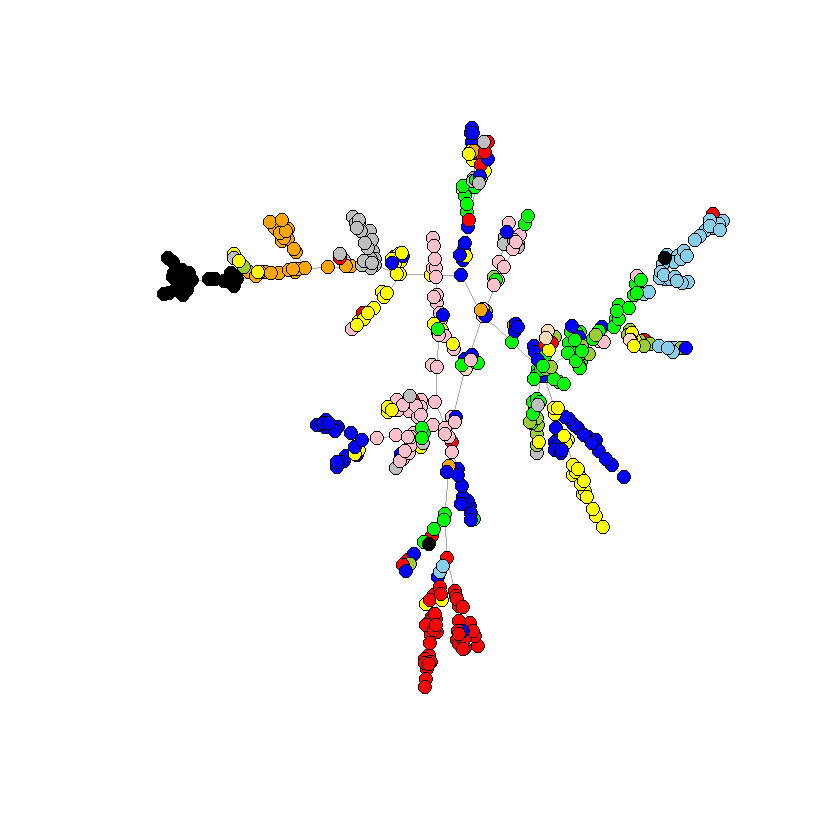

In [30]:
plot(mstw,vertex.size=5, vertex.label=NA, vertex.color=colorsw)

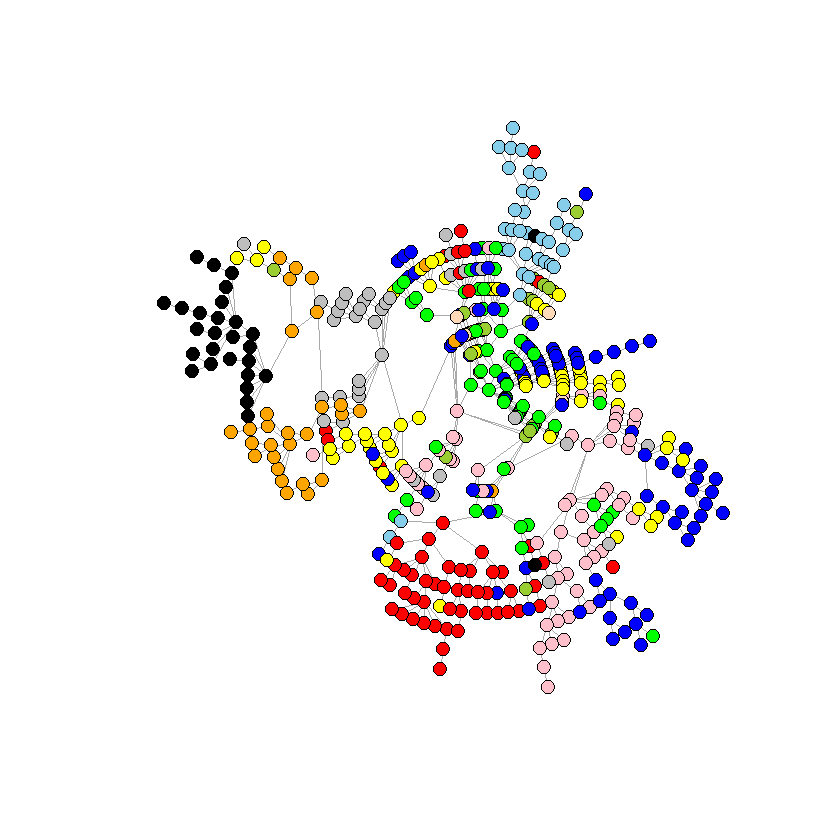

In [31]:
plot(mstw,vertex.size=5, vertex.label=NA, vertex.color=colorsw, layout=layout.reingold.tilford(mstw,circular=T))

In [43]:
p1 = c()
p2 = c()
for(v in c(1:vcount(mstw))){
    neigh = neighbors(mstw,v)
    Ni = length(neigh)
    Qi=0
    for(i in neigh){
        if(allcompw[i,2]==allcompw[v,2])
            Qi=Qi+1
    }
    p1[v] = Qi/Ni
    p2[v] = counts[which(allsectw==allcompw[v,2])]/vcount(mstw)
}
alpha1 = sum(p1)/vcount(mstw)
alpha1
alpha2 = sum(p2)/vcount(mstw)
alpha2

[1] 0.7439573

[1] 0.1147093